Firse remove some unwamted text which is added to json files by DynaPyt. This is done manually.
The following files were modified
dynapyt_1.json
dynapyt_37.json
dynapyt_42.json
dynapyt_47.json


modify two files to handle incorrect json formed due to some issues
dynapyt_22.json
dynapyt_29.json

In [ ]:
import re
import os

dir_content = os.listdir("DynaPyt_output")

for file in dir_content:
    file_path = os.path.join(os.path.abspath("DynaPyt_output"), file)
    with open(file_path, 'r+') as file:
        read_file = file.read()
        
        read_file = re.sub(r"\"'", "\"",read_file)
        read_file = re.sub(r"'\"", "\"",read_file)
        
        file.seek(0)      
        file.write(read_file)
        file.truncate()


Code to check, how many keys match in the Call Graph output provided by PyCG and DynaPyt

In [9]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")

for file in dir_content:
    # print(file)
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    i = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            i+=1

    dynapyt = len(dynapyt_cg.keys())
    pycg = len(pycg_cg.keys())
    
    print("Match", i)


Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0
Match 0


Since, there are no matches, the manual evaluation shows that the key in DynaPyt contains the folder structure from the root, whereas PyCG has the key from the root of the folder, hence update DynaPyt output for key to match those of PyCG

In [11]:
import re
import os

dir_content = os.listdir("DynaPyt_CGs")

for file in dir_content:
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r+') as file:
        read_file = file.read()

        read_file = re.sub(r"\.DyPyBench\.temp\.project\d\d?\.", "",read_file)

        file.seek(0)      
        file.write(read_file)
        file.truncate()



Now, we check for the match again

Project : 11
DynaPyt Keys :  10
PyCG Keys :  3
Matching Keys :  2
Project : 8
DynaPyt Keys :  62
PyCG Keys :  93
Matching Keys :  45
Project : 12
DynaPyt Keys :  124
PyCG Keys :  149
Matching Keys :  78
Project : 38
DynaPyt Keys :  1007
PyCG Keys :  1416
Matching Keys :  673
Project : 32
DynaPyt Keys :  115
PyCG Keys :  164
Matching Keys :  81
Project : 1
DynaPyt Keys :  395
PyCG Keys :  444
Matching Keys :  222
Project : 48
DynaPyt Keys :  47
PyCG Keys :  32
Matching Keys :  14
Project : 37
DynaPyt Keys :  550
PyCG Keys :  697
Matching Keys :  321
Project : 42
DynaPyt Keys :  707
PyCG Keys :  980
Matching Keys :  685
Project : 44
DynaPyt Keys :  67
PyCG Keys :  58
Matching Keys :  22
Project : 22
DynaPyt Keys :  72
PyCG Keys :  86
Matching Keys :  56
Project : 7
DynaPyt Keys :  175
PyCG Keys :  163
Matching Keys :  73
Project : 15
DynaPyt Keys :  189
PyCG Keys :  345
Matching Keys :  145
Project : 29
DynaPyt Keys :  437
PyCG Keys :  383
Matching Keys :  207
Project : 25
DynaPyt Keys :

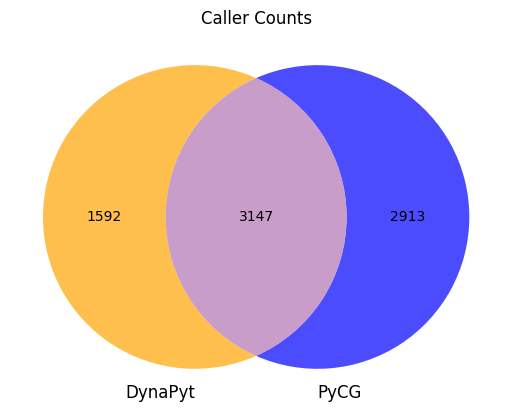

In [3]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")
dynapyt_total = 0
pycg_total = 0
match_total = 0
for file in dir_content:
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    match_project = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            match_project+=1

    dynapyt = len(dynapyt_cg.keys())
    pycg = len(pycg_cg.keys())
    
    dynapyt_total+=dynapyt
    pycg_total+=pycg
    match_total+=match_project
    
    print("Project : " + file_path.split("/")[-1].split(".")[0].split("_")[1])
    print("DynaPyt Keys : ", dynapyt)
    print("PyCG Keys : ", pycg)
    print("Matching Keys : ", match_project)

print("All 20 projects")
print("DynaPyt Keys : ", dynapyt_total)
print("PyCG Keys : ", pycg_total)
print("Matching Keys : ", match_total)

print("% match from DynaPyt : ", (match_total * 100) / dynapyt_total)
print("% match from PyCG : ", (match_total * 100) / pycg_total)


# import modules
from matplotlib_venn import venn2_unweighted 
from matplotlib import pyplot as plt

# depict venn diagram
venn2_unweighted(subsets = (dynapyt_total - match_total, pycg_total - match_total, match_total),
                set_labels = ('DynaPyt', 
                            'PyCG'),
                set_colors=("orange",
                            "blue"),alpha=0.7)
plt.title("Caller Counts")
plt.show()

Manual verification of unmatched keys
Values of PyCG as keys, e.g., <builtin>.str
skipped test cases will be present in PyCG
Hence, more keys in PyCG verified 

In [18]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")
for file in dir_content:
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    print("Project : " + file_path.split("/")[-1].split(".")[0].split("_")[1])
    for key in pycg_cg.keys():
        if key not in dynapyt_cg.keys():
            print(key)



Project : 11
tests.test_chain
Project : 8
test.test_cmdline
io.BytesIO
io.StringIO
mock.patch.object
dh_virtualenv.cmdline.DebhelperOptionParser
nose.tools.eq_
mock.patch.dict
warnings.catch_warnings
<builtin>.len
<builtin>.issubclass
nose.tools.ok_
<builtin>.str
mock.patch
os.path.abspath
os.path.join
test.test_deployment.temporary_dir
functools.wraps
test.test_deployment.temporary_dir._inner
tempfile.mkdtemp
test.test_deployment.test_fix_local_symlinks_does_not_blow_up_on_missing_local
test.test_deployment.test_find_script_files_long_shebang
test.test_deployment.test_find_script_files_normal_shebang
test.test_deployment.test_fix_local_symlinks
test.test_deployment.test_fix_local_symlinks_with_relative_links
shutil.rmtree
test.test_deployment.create_new_style_shebang
test.test_deployment.test_shebangs_fix
test.test_deployment.test_shebangs_fix_overridden_root
test.test_deployment.test_shebangs_fix_special_chars_in_path
test.test_deployment.check_shebangs_fix
dh_virtualenv.Deployment
t

Now we check for the matches in the values provided by matching keys.

In [5]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")
dynapyt_total = 0
pycg_total = 0
match_total = 0

for file in dir_content:
    dynapyt_values = 0
    pycg_values = 0
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    match_project = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            dynapyt_values+=len(dynapyt_cg[key])
            pycg_values+=len(pycg_cg[key])
            
            match_key = 0
            for value1 in dynapyt_cg[key]:
                match_multiple = 0
                # temp1 = value1[::-1]
                for value2 in pycg_cg[key]:
                    # temp2 = value2[::-1]
                    if value1 == value2 :
                        match_key+=1
                        match_multiple+=1
                if match_multiple > 1:
                    print("multiple match")
            match_project+=match_key
    
    dynapyt_total+=dynapyt_values
    pycg_total+=pycg_values
    match_total+=match_project
    
    print("Project : " + file_path.split("/")[-1].split(".")[0].split("_")[1])
    print("DynaPyt Values : ", dynapyt_values)
    print("PyCG Values : ", pycg_values)
    print("Matching Values : ", match_project)

print("All 20 projects")
print("DynaPyt Values : ", dynapyt_total)
print("PyCG Values : ", pycg_total)
print("Matching Values : ", match_total)
print(dynapyt_total+pycg_total)

print("% match from DynaPyt : ", (match_total * 100) / dynapyt_total)
print("% match from PyCG : ", (match_total * 100) / pycg_total)


Project : 11
DynaPyt Values :  5
PyCG Values :  1
Matching Values :  1
Project : 8
DynaPyt Values :  186
PyCG Values :  113
Matching Values :  31
Project : 12
DynaPyt Values :  218
PyCG Values :  153
Matching Values :  69
Project : 38
DynaPyt Values :  2227
PyCG Values :  1501
Matching Values :  396
Project : 32
DynaPyt Values :  331
PyCG Values :  182
Matching Values :  72
Project : 1
DynaPyt Values :  994
PyCG Values :  812
Matching Values :  67
Project : 48
DynaPyt Values :  45
PyCG Values :  32
Matching Values :  18
Project : 37
DynaPyt Values :  966
PyCG Values :  596
Matching Values :  286
Project : 42
DynaPyt Values :  2036
PyCG Values :  793
Matching Values :  215
Project : 44
DynaPyt Values :  50
PyCG Values :  37
Matching Values :  22
Project : 22
DynaPyt Values :  145
PyCG Values :  88
Matching Values :  32
Project : 7
DynaPyt Values :  267
PyCG Values :  98
Matching Values :  32
Project : 15
DynaPyt Values :  422
PyCG Values :  203
Matching Values :  55
Project : 29
DynaPyt

We see that the values for PyCG are less as compared to DynaPyt, we inspect manually
this is because of the function runtime functions had some extra functions, also there were same funcitons multiple times due to different object values
PyCG, does not work on objects so the call reduces to one.
We see that certain patterns should match, but do not match because of certain substring differences.

In [25]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")
dynapyt_total = 0
pycg_total = 0
match_total = 0

for file in dir_content:
    dynapyt_values = 0
    pycg_values = 0
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    match_project = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            dynapyt_values+=len(dynapyt_cg[key])
            pycg_values+=len(pycg_cg[key])
            
            print(dynapyt_cg[key])
            print(pycg_cg[key])            
                        
            match_key = 0
            for value1 in dynapyt_cg[key]:
                match_multiple = 0
                # temp1 = value1[::-1]
                for value2 in pycg_cg[key]:
                    # temp2 = value2[::-1]
                    if value1 == value2 :
                        match_key+=1
                        match_multiple+=1
                if match_multiple > 1:
                    print("multiple match")
                print(key)
                print(match_key)
            match_project+=match_key


['delegator.chain']
['delegator.chain']
tests.test_chain.test_chain
1
['delegator._expand_args', 'delegator.run', 'delegator.Command.send', 'pexpect.popen_spawn.PopenSpawn.sendeof']
[]
delegator.chain
0
delegator.chain
0
delegator.chain
0
delegator.chain
0
['_io.StringIO']
['io.StringIO', 'io.BytesIO']
test.test_cmdline.get_mocked_stderr
0
['dh_virtualenv.cmdline.DebhelperOptionParser', 'dh_virtualenv.cmdline.DebhelperOptionParser.parse_args', 'nose.tools.trivial.eq_']
['nose.tools.eq_', 'dh_virtualenv.cmdline.DebhelperOptionParser']
test.test_cmdline.test_unknown_argument_is_error
1
test.test_cmdline.test_unknown_argument_is_error
1
test.test_cmdline.test_unknown_argument_is_error
1
['dh_virtualenv.cmdline.DebhelperOptionParser', 'optparse.OptionContainer.add_option', 'dh_virtualenv.cmdline.DebhelperOptionParser.parse_args', 'nose.tools.trivial.eq_']
['nose.tools.eq_', 'dh_virtualenv.cmdline.DebhelperOptionParser']
test.test_cmdline.test_test_debhelper_option_parsing
1
test.test_cmdli

now, we add substring differences to increase the value matches
        read_file = re.sub(r"<builtin>", "builtins", read_file)
        read_file = re.sub(r"unittest.TestCase", "unittest.case.TestCase", read_file)
        read_file = re.sub(r"os.path", "posixpath.", read_file)
        read_file = re.sub(r"os.", "posix.", read_file)
        __init__
        _io.

Project : 11
DynaPyt Values :  5
PyCG Values :  1
Matching Values :  1
Project : 8
DynaPyt Values :  186
PyCG Values :  113
Matching Values :  39
Project : 12
DynaPyt Values :  218
PyCG Values :  153
Matching Values :  147
multiple match
multiple match
Project : 38
DynaPyt Values :  2227
PyCG Values :  1501
Matching Values :  672
Project : 32
DynaPyt Values :  331
PyCG Values :  182
Matching Values :  161
Project : 1
DynaPyt Values :  994
PyCG Values :  812
Matching Values :  116
Project : 48
DynaPyt Values :  45
PyCG Values :  32
Matching Values :  21
Project : 37
DynaPyt Values :  966
PyCG Values :  596
Matching Values :  377
Project : 42
DynaPyt Values :  2036
PyCG Values :  793
Matching Values :  413
Project : 44
DynaPyt Values :  50
PyCG Values :  37
Matching Values :  27
Project : 22
DynaPyt Values :  145
PyCG Values :  88
Matching Values :  37
Project : 7
DynaPyt Values :  267
PyCG Values :  98
Matching Values :  92
Project : 15
DynaPyt Values :  422
PyCG Values :  203
Matching 

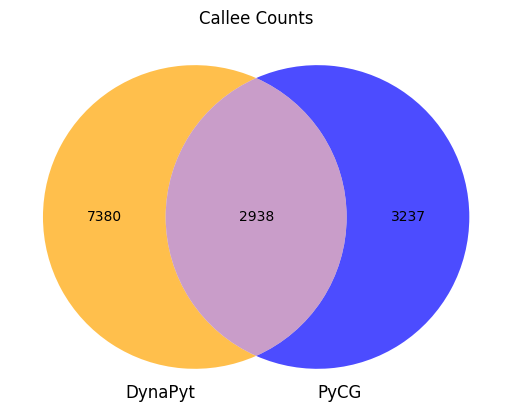

In [49]:
import json
import os

dir_content = os.listdir("DynaPyt_CGs")
dynapyt_total = 0
pycg_total = 0
match_total = 0

for file in dir_content:
    dynapyt_values = 0
    pycg_values = 0
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    match_project = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            dynapyt_values+=len(dynapyt_cg[key])
            pycg_values+=len(pycg_cg[key])
            
            match_key = 0
            for value1 in dynapyt_cg[key]:
                match_multiple = 0
                temp1 = value1 + '.__init__'
                # temp1 = value1[::-1]
                for value2 in pycg_cg[key]:
                    temp2 = '_' + value2
                    temp3 = re.sub(r"<builtin>.", "builtins.", value2)
                    temp3 = re.sub(r"unittest.TestCase", "unittest.case.TestCase", temp3)
                    temp3 = re.sub(r"os.path.", "posixpath.", temp3)
                    temp3 = re.sub(r"os.", "posix.", temp3)
                    # print(temp1)
                    # temp2 = value2[::-1]
                    if value1 == value2 or temp1 == value2 or value1 == temp2 or value1 == temp3 :
                        match_key+=1
                        match_multiple+=1
                if match_multiple > 1:
                    print("multiple match")
            match_project+=match_key
    
    dynapyt_total+=dynapyt_values
    pycg_total+=pycg_values
    match_total+=match_project
    
    print("Project : " + file_path.split("/")[-1].split(".")[0].split("_")[1])
    print("DynaPyt Values : ", dynapyt_values)
    print("PyCG Values : ", pycg_values)
    print("Matching Values : ", match_project)

print("All 20 projects")
print("DynaPyt Values : ", dynapyt_total)
print("PyCG Values : ", pycg_total)
print("Matching Values : ", match_total)

print("% match from DynaPyt : ", (match_total * 100) / dynapyt_total)
print("% match from PyCG : ", (match_total * 100) / pycg_total)


# import modules
from matplotlib_venn import venn2_unweighted 
from matplotlib import pyplot as plt

# depict venn diagram
venn2_unweighted(subsets = (dynapyt_total - match_total, pycg_total - match_total, match_total),
                set_labels = ('DynaPyt', 
                            'PyCG'),
                set_colors=("orange",
                            "blue"),alpha=0.7)
plt.title("Callee Counts")
plt.show()


Now we replace the duplicate values due to objects in DynaPYt values, and then the total values in DynaPyt changes, so we get improvement

Project : 11
DynaPyt Values :  5
PyCG Values :  1
Matching Values :  1
Project : 8
DynaPyt Values :  186
PyCG Values :  113
Matching Values :  39
Project : 12
DynaPyt Values :  218
PyCG Values :  153
Matching Values :  147
multiple match
multiple match
Project : 38
DynaPyt Values :  2227
PyCG Values :  1501
Matching Values :  672
Project : 32
DynaPyt Values :  331
PyCG Values :  182
Matching Values :  161
Project : 1
DynaPyt Values :  994
PyCG Values :  812
Matching Values :  116
Project : 48
DynaPyt Values :  45
PyCG Values :  32
Matching Values :  21
Project : 37
DynaPyt Values :  960
PyCG Values :  596
Matching Values :  377
Project : 42
DynaPyt Values :  2034
PyCG Values :  793
Matching Values :  413
Project : 44
DynaPyt Values :  50
PyCG Values :  37
Matching Values :  27
Project : 22
DynaPyt Values :  120
PyCG Values :  88
Matching Values :  37
Project : 7
DynaPyt Values :  267
PyCG Values :  98
Matching Values :  92
Project : 15
DynaPyt Values :  422
PyCG Values :  203
Matching 

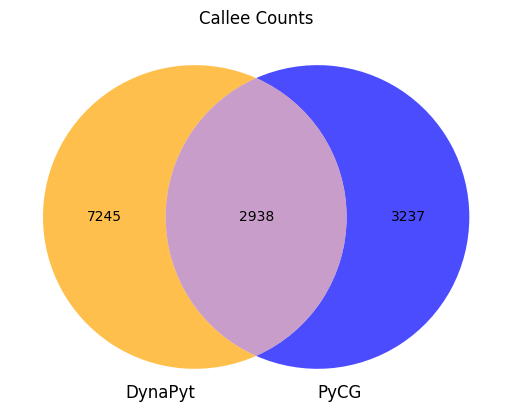

In [7]:
import json
import os
import re

dir_content = os.listdir("DynaPyt_CGs")
dynapyt_total = 0
pycg_total = 0
match_total = 0

for file in dir_content:
    dynapyt_values = 0
    pycg_values = 0
    file_path = os.path.join(os.path.abspath("DynaPyt_CGs"), file)
    with open(file_path, 'r') as file1:
        dynapyt_cg = json.load(file1)
    file_path = file_path.replace("DynaPyt_CGs", "PyCG_CGs")
    file_path = file_path.replace("dynapyt_","pycg_")
    # print(file_path)
    if not os.path.exists(file_path):
        continue
    with open(file_path, 'r') as file2:
        pycg_cg = json.load(file2)
    match_project = 0
    for key in pycg_cg.keys():
        if key in dynapyt_cg.keys():
            
            temp_values = [] 
            for value in dynapyt_cg[key]:
                temp4 = re.search(r"^<.* object at .*>$", value)
                # BoundMethodWeakref(<tests.test_saferef._Sample1 object at 0x7f73338edb10>.x)
                temp5 = re.search(r"^BoundMethodWeakref\(.* object at .*\)$", value)
                if not temp4 == None:
                    temp = temp4.group()[1:].split(' ')[0]
                elif not temp5 == None:
                    # temp5 = temp5.group().replace(r" object at .*\>", ">")
                    temp = re.sub(r" object at .*\>", ">", temp5.group())
                else:
                    temp = value
                    
                if temp not in temp_values:
                    temp_values.append(temp)

            dynapyt_cg[key] = temp_values
            dynapyt_values+=len(dynapyt_cg[key])
            pycg_values+=len(pycg_cg[key])

            match_key = 0
            for value1 in dynapyt_cg[key]:
                match_multiple = 0
                temp1 = value1 + '.__init__'
                # temp1 = value1[::-1]
                for value2 in pycg_cg[key]:
                    temp2 = '_' + value2
                    temp3 = re.sub(r"<builtin>.", "builtins.", value2)
                    temp3 = re.sub(r"unittest.TestCase", "unittest.case.TestCase", temp3)
                    temp3 = re.sub(r"os.path.", "posixpath.", temp3)
                    temp3 = re.sub(r"os.", "posix.", temp3)
                    # print(temp1)
                    # temp2 = value2[::-1]
                    if value1 == value2 or temp1 == value2 or value1 == temp2 or value1 == temp3 :
                        match_key+=1
                        match_multiple+=1
                if match_multiple > 1:
                    print("multiple match")
            match_project+=match_key
    
    dynapyt_total+=dynapyt_values
    pycg_total+=pycg_values
    match_total+=match_project
    
    print("Project : " + file_path.split("/")[-1].split(".")[0].split("_")[1])
    print("DynaPyt Values : ", dynapyt_values)
    print("PyCG Values : ", pycg_values)
    print("Matching Values : ", match_project)

print("All 20 projects")
print("DynaPyt Values : ", dynapyt_total)
print("PyCG Values : ", pycg_total)
print("Matching Values : ", match_total)

print("% match from DynaPyt : ", (match_total * 100) / dynapyt_total)
print("% match from PyCG : ", (match_total * 100) / pycg_total)
print(dynapyt_total+pycg_total)


# import modules
from matplotlib_venn import venn2_unweighted 
from matplotlib import pyplot as plt

# depict venn diagram
venn2_unweighted(subsets = (dynapyt_total - match_total, pycg_total - match_total, match_total),
                set_labels = ('DynaPyt', 
                            'PyCG'),
                set_colors=("orange",
                            "blue"),alpha=0.7)
plt.title("Callee Counts")
plt.show()
